# Linear Function Approximation with Noise (Oefenopdracht 2)

## 1. Generate Data
Including noise this time

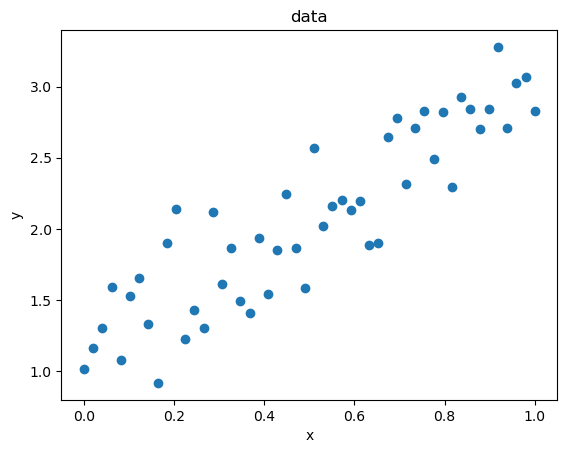

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simpele dataset
xdat = np.linspace(0, 1, 50).reshape(-1, 1)   # 50 puntjes tussen 0 en 1
ydat = 2 * xdat + 1 + np.random.normal(scale=0.3, size=xdat.shape)


# Plot data
plt.scatter(xdat, ydat)
plt.title("data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## 2. Baseline Model

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Convert data to PyTorch tensors
x = torch.from_numpy(xdat).float()
y = torch.from_numpy(ydat).float()


# Basic model without hidden layers. Hidden layers aren't necessary since the data follows a straight line, 
# meaning it can be solved with linear regression
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.output = nn.Linear(1, 1)  # input -> output directly

    def forward(self, x):
        return self.output(x)

model = LinearModel()

# Loss Function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)  # similar to Keras adam



## 3. Train Model

In [22]:
epochs = 5000
n_epoch = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if loss.item() < 0.00005:
        n_epoch = epoch
        break

print(f"Final loss: {loss.item():.4f}, Total epochs: {n_epoch}")


Final loss: 0.0766, Total epochs: 5000


## 4. Predictions   

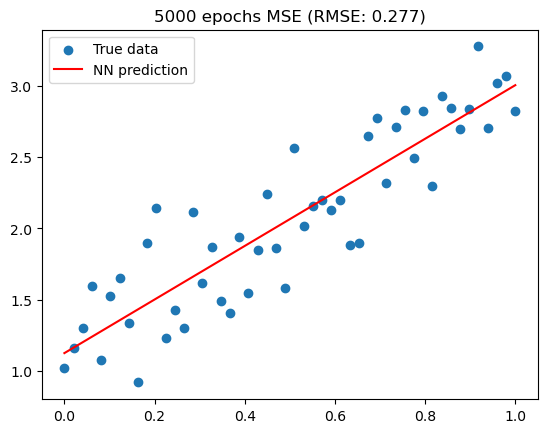

In [23]:
xplot = torch.from_numpy(np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32))
ypred = model(xplot).detach().numpy()

plt.scatter(xdat, ydat, label="True data")
plt.plot(np.linspace(0,1,100), ypred, 'r', label="NN prediction")
plt.title("5000 epochs MSE (RMSE: 0.277)")
plt.legend()
plt.show()

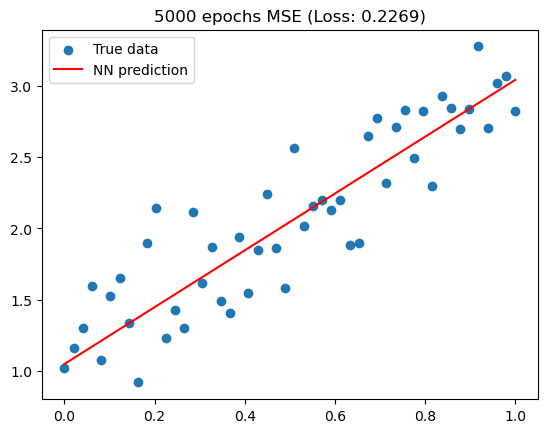

In [19]:
xplot = torch.from_numpy(np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32))
ypred = model(xplot).detach().numpy()

plt.scatter(xdat, ydat, label="True data")
plt.plot(np.linspace(0,1,100), ypred, 'r', label="NN prediction")
plt.title("5000 epochs MSE (Loss: 0.2269)")
plt.legend()
plt.show()

## 5. Conclusion
MAE is a better loss function if the data is noisy since MAE handles outliers better than MSE. Since MSE squares the errors it is more sensitive to higher errors and therefore stuggles generalizing.